<a href="https://colab.research.google.com/github/HimanshuPathak2725/googleColab/blob/main/ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("crowww/a-large-scale-fish-dataset")

print("Path to dataset files:", path)

100%|██████████| 3.24G/3.24G [00:42<00:00, 81.1MB/s]


Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/crowww/a-large-scale-fish-dataset/versions/2


In [ ]:
import os
import shutil

destination_path = "/content/a-large-scale-fish-dataset"

# Create the destination directory if it doesn't exist
os.makedirs(destination_path, exist_ok=True)

# Move the contents of the source directory to the destination directory
for item in os.listdir(path):
    s = os.path.join(path, item)
    d = os.path.join(destination_path, item)
    if os.path.isdir(s):
        shutil.move(s, d)
    else:
        shutil.move(s, destination_path)

print(f"Dataset moved from {path} to {destination_path}")

Dataset moved from /root/.cache/kagglehub/datasets/crowww/a-large-scale-fish-dataset/versions/2 to /content/a-large-scale-fish-dataset


In [ ]:
'''Data Handling & Linear Algebra'''
import numpy as np
import pandas as pd

'''Visualisation'''
import matplotlib.pyplot as plt
import seaborn as sns

'''Manipulating Data and Model Building'''
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.python.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

'''Implementation of Transfer Learning'''
from tensorflow.keras.applications import MobileNetV2

'''Image generation and preprocessing'''
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

'''Result and Performance Analysis'''
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

'''Ignoring Warnings'''
import warnings
warnings.filterwarnings("ignore")

In [ ]:
DIR = '/content/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset' #Creating a master directory
classes = [i for i in os.listdir(DIR) if '.' not in i]                     #Creating classes out of the required folders
classes

['Red Sea Bream',
 'Shrimp',
 'Black Sea Sprat',
 'Striped Red Mullet',
 'Red Mullet',
 'Hourse Mackerel',
 'Sea Bass',
 'Gilt-Head Bream',
 'Trout']

In [ ]:
# Create a dataframe with a column which consists of all the filepaths (without GT) and its respective label as the other column

label = []
path = []

for dirname, _,filenames in os.walk(DIR):
    for filename in filenames:
        if os.path.splitext(filename)[-1]=='.png':               # If filename contains .png
            if dirname.split()[-1]!='GT':                       # If directory doesn't contain GT
                label.append(os.path.split(dirname)[-1])         # Append the directory name to label
                path.append(os.path.join(dirname,filename))     # Append all the png files to path of that directory

# Ready to create the df
df = pd.DataFrame(columns=['path','label'])
df['path']=path
df['label']=label

In [ ]:
df.head()

,path,label
0,/content/a-large-scale-fish-dataset/Fish_Datas...,Red Sea Bream
1,/content/a-large-scale-fish-dataset/Fish_Datas...,Red Sea Bream
2,/content/a-large-scale-fish-dataset/Fish_Datas...,Red Sea Bream
3,/content/a-large-scale-fish-dataset/Fish_Datas...,Red Sea Bream
4,/content/a-large-scale-fish-dataset/Fish_Datas...,Red Sea Bream


In [ ]:
df.path[0]

'/content/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Red Sea Bream/Red Sea Bream/00516.png'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    9000 non-null   object
 1   label   9000 non-null   object
dtypes: object(2)
memory usage: 140.8+ KB


In [ ]:
# df['label']=df['label'].astype('category')
df['label'].value_counts()

,count
label,
Red Sea Bream,1000
Shrimp,1000
Black Sea Sprat,1000
Striped Red Mullet,1000
Red Mullet,1000
Hourse Mackerel,1000
Sea Bass,1000
Gilt-Head Bream,1000
Trout,1000


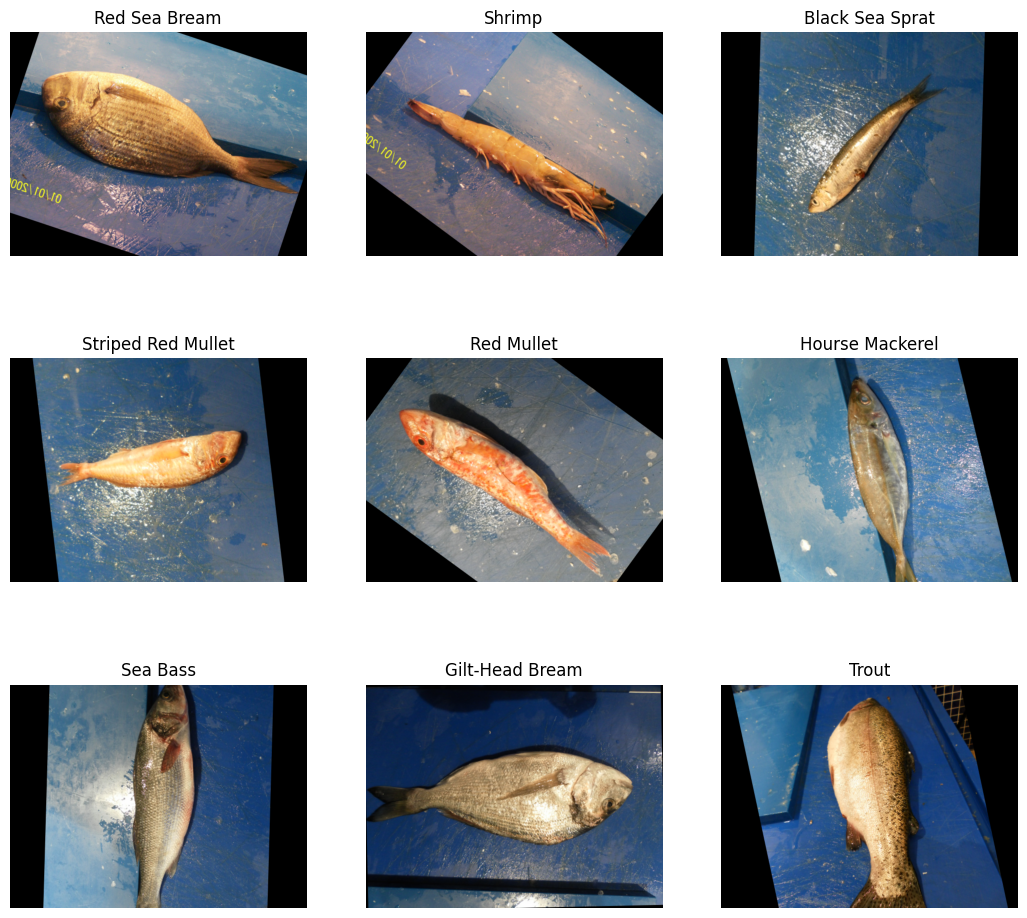

In [ ]:
#Data image plotting
idx = 0
plt.figure(figsize=(13,12))
for unique_label in df['label'].unique():
    plt.subplot(3, 3, idx+1)
    plt.imshow(plt.imread(df[df['label']==unique_label].iloc[0,0]))
    plt.title(unique_label)
    plt.axis('off')
    idx+=1

TRAIN TEST SPLIT

In [ ]:
#Creating the test train split with shuffle
train_df, test_df = train_test_split(df, train_size=0.8, shuffle=True, random_state=42)

In [ ]:
#Checking the shape of the newly obtained data
print(train_df.shape)
print(test_df.shape)

(7200, 2)
(1800, 2)


In [ ]:
#Using Keras Image Data Generator to preprocess our images with the model we wish to use
train_generator = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.2)
test_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
train_images = train_generator.flow_from_dataframe(dataframe=train_df, x_col='path', y_col='label', target_size=(224, 224), color_mode='rgb', class_mode='categorical', batch_size=32, shuffle=True, seed=42, subset='training')
val_images = train_generator.flow_from_dataframe(dataframe=train_df, x_col='path', y_col='label', target_size=(224, 224), color_mode='rgb', class_mode='categorical', batch_size=32, shuffle=True, seed=42, subset='validation' )
test_images = test_generator.flow_from_dataframe(dataframe=test_df, x_col='path', y_col='label', target_size=(224, 224), color_mode='rgb', class_mode='categorical', batch_size=32, shuffle=False )

Found 5760 validated image filenames belonging to 9 classes.
Found 1440 validated image filenames belonging to 9 classes.
Found 1800 validated image filenames belonging to 9 classes.


In [ ]:
display(train_images.class_indices)
display(val_images.class_indices)
display(test_images.class_indices)

{'Black Sea Sprat': 0,
 'Gilt-Head Bream': 1,
 'Hourse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Shrimp': 6,
 'Striped Red Mullet': 7,
 'Trout': 8}

{'Black Sea Sprat': 0,
 'Gilt-Head Bream': 1,
 'Hourse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Shrimp': 6,
 'Striped Red Mullet': 7,
 'Trout': 8}

{'Black Sea Sprat': 0,
 'Gilt-Head Bream': 1,
 'Hourse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Shrimp': 6,
 'Striped Red Mullet': 7,
 'Trout': 8}

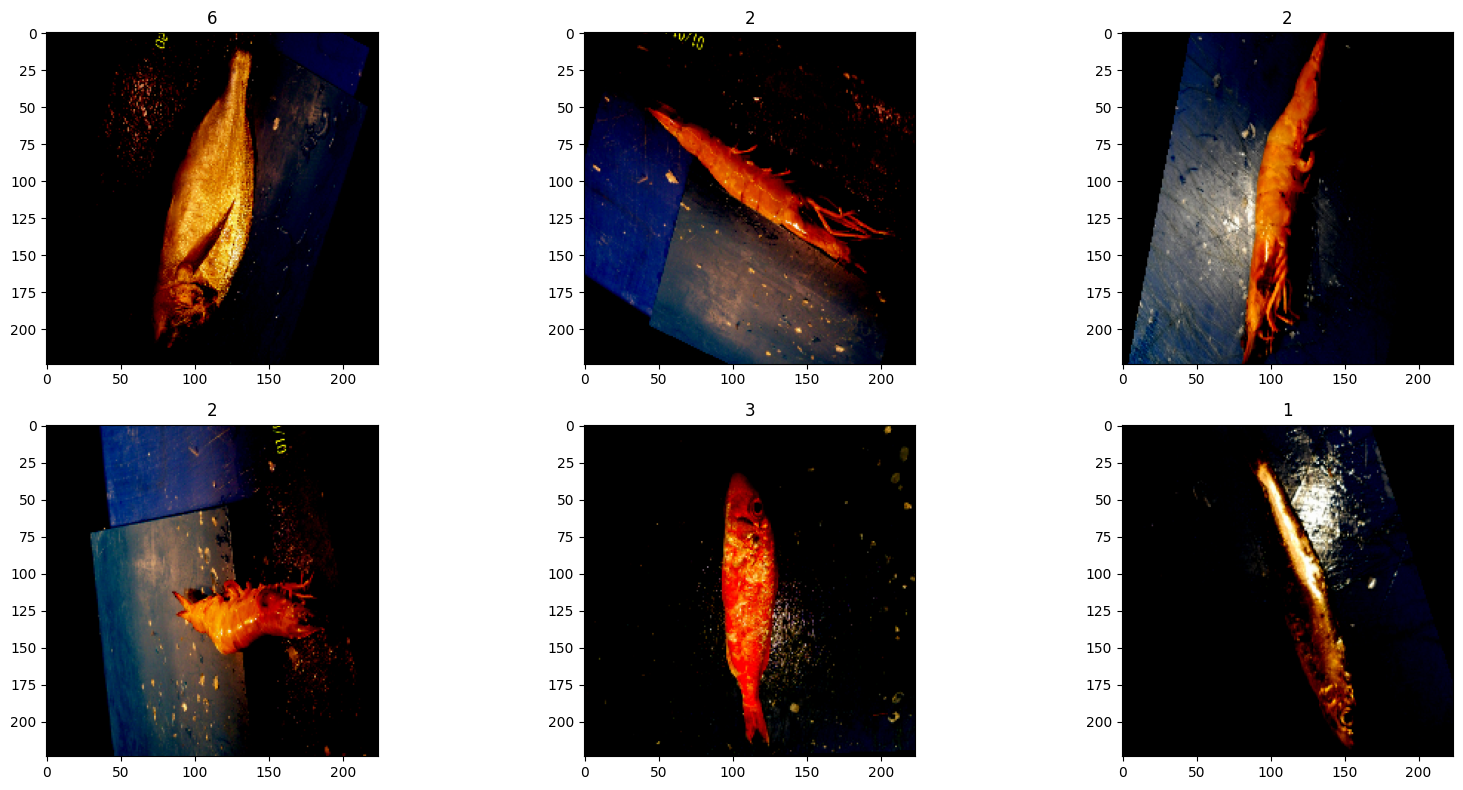

In [ ]:
#Plotting images after pre-processing

fit, ax= plt.subplots(nrows=2, ncols=3, figsize=(17,8))
ax=ax.flatten()
j=0
for img, label in test_images:
    if j < 6:
        ax[j].imshow(img[0],)
        ax[j].set_title(test_images.classes[np.argmax(label[0])])
        j=j+1
    else:
        break
plt.tight_layout()
plt.show()

In [ ]:
#Importing our pretrained model : MobileNetV2

pretrained_model = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='avg'
)

pretrained_model.trainable = False

9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
#Creating our model inputs
inputs = pretrained_model.input

x = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(9, activation='softmax')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])

history = model.fit(train_images,
                    validation_data=val_images,
                    epochs=5)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 112, 112,  │        864 │ input_layer[0][0] │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 112, 112,  │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 112, 112,  │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 112, 112,  │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 112, 112,  │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 112, 112,  │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 112, 112,  │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 112, 112,  │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 113, 113,  │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 56, 56,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 56, 56,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 56, 56,    │      2,304 │ block_1_depthwis

 Total params: 2,439,625 (9.31 MB)

 Trainable params: 181,641 (709.54 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/5
180/180 ━━━━━━━━━━━━━━━━━━━━ 100s 441ms/step - accuracy: 0.8590 - loss: 0.5043 - val_accuracy: 0.9951 - val_loss: 0.0207
Epoch 2/5
180/180 ━━━━━━━━━━━━━━━━━━━━ 74s 410ms/step - accuracy: 0.9969 - loss: 0.0132 - val_accuracy: 0.9278 - val_loss: 0.3815
Epoch 3/5
180/180 ━━━━━━━━━━━━━━━━━━━━ 80s 443ms/step - accuracy: 0.9870 - loss: 0.0411 - val_accuracy: 0.9986 - val_loss: 0.0028
Epoch 4/5
180/180 ━━━━━━━━━━━━━━━━━━━━ 83s 464ms/step - accuracy: 0.9998 - loss: 0.0014 - val_accuracy: 0.9965 - val_loss: 0.0086
Epoch 5/5
180/180 ━━━━━━━━━━━━━━━━━━━━ 75s 417ms/step - accuracy: 0.9993 - loss: 0.0026 - val_accuracy: 0.9993 - val_loss: 0.0019


In [ ]:
results = model.evaluate(test_images, verbose=0)
print("Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

Test Loss: 0.00235
Test Accuracy: 99.94%


In [ ]:
pred = model.predict(test_images)
pred=np.argmax(pred,axis=1)

57/57 ━━━━━━━━━━━━━━━━━━━━ 29s 406ms/step


In [ ]:
pred_df=test_df.copy()
labels={}
for l,v in test_images.class_indices.items():
    labels.update({v:l})
pred_df['pred']=pred
pred_df['pred']=pred_df['pred'].apply(lambda x: labels[x])

In [ ]:
# Visualize the pred_df
pred_df=pred_df.reset_index(drop=True)
pred_df.head(10)

,path,label,pred
0,/content/a-large-scale-fish-dataset/Fish_Datas...,Gilt-Head Bream,Gilt-Head Bream
1,/content/a-large-scale-fish-dataset/Fish_Datas...,Shrimp,Shrimp
2,/content/a-large-scale-fish-dataset/Fish_Datas...,Red Sea Bream,Red Sea Bream
3,/content/a-large-scale-fish-dataset/Fish_Datas...,Red Mullet,Red Mullet
4,/content/a-large-scale-fish-dataset/Fish_Datas...,Trout,Trout
5,/content/a-large-scale-fish-dataset/Fish_Datas...,Trout,Trout
6,/content/a-large-scale-fish-dataset/Fish_Datas...,Hourse Mackerel,Hourse Mackerel
7,/content/a-large-scale-fish-dataset/Fish_Datas...,Trout,Trout
8,/content/a-large-scale-fish-dataset/Fish_Datas...,Striped Red Mullet,Striped Red Mullet
9,/content/a-large-scale-fish-dataset/Fish_Datas...,Red Mullet,Red Mullet


In [ ]:
# Incorrect prediction
pred_df[pred_df['label']!=pred_df['pred']]

,path,label,pred
698,/content/a-large-scale-fish-dataset/Fish_Datas...,Striped Red Mullet,Red Mullet


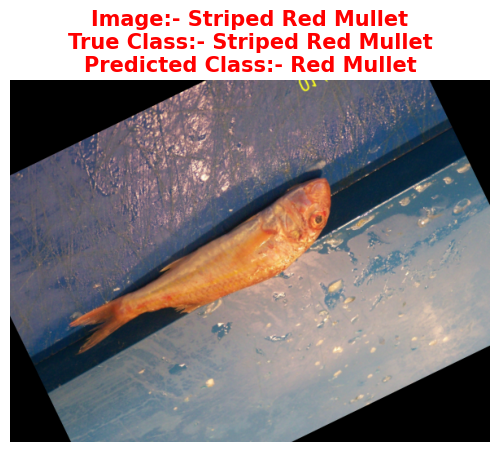

In [ ]:
# Which image was it?
plt.figure(figsize=(15, 8))

incorrect_indices = pred_df[pred_df['label'] != pred_df['pred']].index.tolist()

for i, idx in enumerate(incorrect_indices):
    plt.subplot(1, 3, i + 1)
    plt.imshow(plt.imread(pred_df.path[idx]))
    title1 = pred_df.path[idx].split('/')[-2]
    title2 = pred_df.label[idx].split('/')[-1]
    title3 = pred_df.pred[idx]
    plt.title(f'Image:- {title2}\nTrue Class:- {title1}\nPredicted Class:- {title3}', color = 'r', weight = 'bold', fontsize = 15)
    plt.axis('off')

plt.tight_layout()
plt.show()

Accuracy Score: 0.9994444444444445


<Axes: >

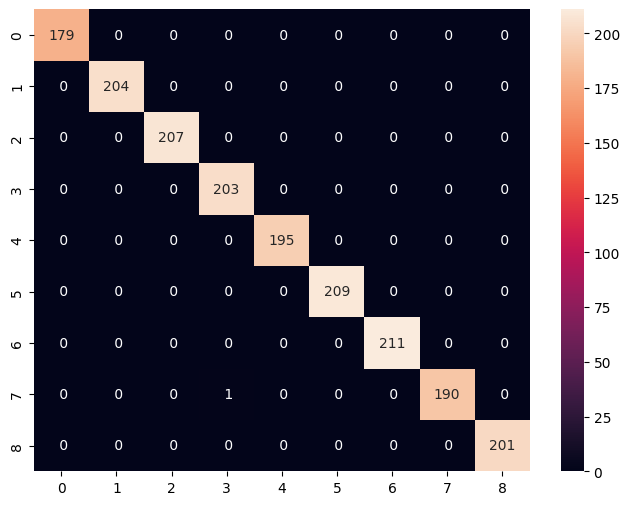

In [ ]:
#Checking the accuracy score and creating a Confusion Matrix
print(f"Accuracy Score: {accuracy_score(pred_df['label'],pred_df['pred'])}")
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(pred_df['label'],pred_df['pred']), annot=True, fmt='2d')

In [ ]:
#Generating the Classification Report for in-depth analysis
print(classification_report(pred_df['label'],pred_df['pred']))

                    precision    recall  f1-score   support

   Black Sea Sprat       1.00      1.00      1.00       179
   Gilt-Head Bream       1.00      1.00      1.00       204
   Hourse Mackerel       1.00      1.00      1.00       207
        Red Mullet       1.00      1.00      1.00       203
     Red Sea Bream       1.00      1.00      1.00       195
          Sea Bass       1.00      1.00      1.00       209
            Shrimp       1.00      1.00      1.00       211
Striped Red Mullet       1.00      0.99      1.00       191
             Trout       1.00      1.00      1.00       201

          accuracy                           1.00      1800
         macro avg       1.00      1.00      1.00      1800
      weighted avg       1.00      1.00      1.00      1800



In [ ]:
#Saving the model using joblib in pkl format
import joblib
joblib.dump(model, 'fish_model.pkl')

['fish_model.pkl']

In [ ]:
#predictig using the saved model
loaded_model = joblib.load('fish_model.pkl')

57/57 ━━━━━━━━━━━━━━━━━━━━ 18s 317ms/step


,path,label,pred
7940,/content/a-large-scale-fish-dataset/Fish_Datas...,Gilt-Head Bream,Gilt-Head Bream
1162,/content/a-large-scale-fish-dataset/Fish_Datas...,Shrimp,Shrimp
582,/content/a-large-scale-fish-dataset/Fish_Datas...,Red Sea Bream,Red Sea Bream
4081,/content/a-large-scale-fish-dataset/Fish_Datas...,Red Mullet,Red Mullet
8412,/content/a-large-scale-fish-dataset/Fish_Datas...,Trout,Trout


Accuracy Score (Loaded Model): 0.9994444444444445


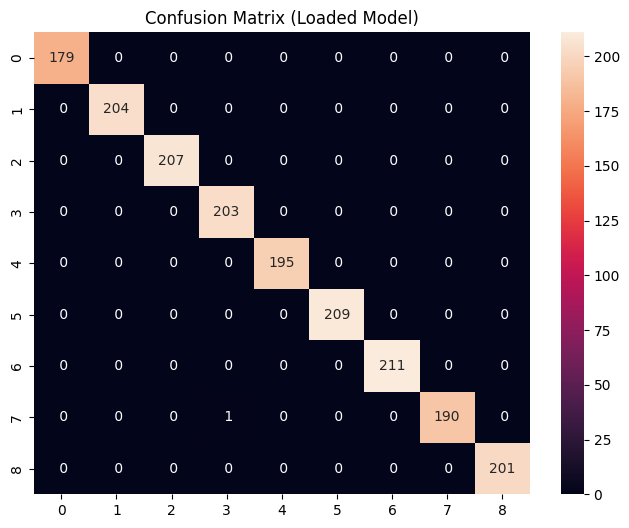

Classification Report (Loaded Model):
                    precision    recall  f1-score   support

   Black Sea Sprat       1.00      1.00      1.00       179
   Gilt-Head Bream       1.00      1.00      1.00       204
   Hourse Mackerel       1.00      1.00      1.00       207
        Red Mullet       1.00      1.00      1.00       203
     Red Sea Bream       1.00      1.00      1.00       195
          Sea Bass       1.00      1.00      1.00       209
            Shrimp       1.00      1.00      1.00       211
Striped Red Mullet       1.00      0.99      1.00       191
             Trout       1.00      1.00      1.00       201

          accuracy                           1.00      1800
         macro avg       1.00      1.00      1.00      1800
      weighted avg       1.00      1.00      1.00      1800



In [ ]:
# Generate predictions using the loaded model
loaded_pred = loaded_model.predict(test_images)
loaded_pred = np.argmax(loaded_pred, axis=1)

# Create a DataFrame for comparison with loaded model predictions
loaded_pred_df = test_df.copy()
loaded_pred_df['pred'] = loaded_pred
loaded_pred_df['pred'] = loaded_pred_df['pred'].apply(lambda x: labels[x])

# Display the head of the loaded predictions DataFrame
display(loaded_pred_df.head())

# Checking the accuracy score and creating a Confusion Matrix for loaded model
print(f"Accuracy Score (Loaded Model): {accuracy_score(loaded_pred_df['label'], loaded_pred_df['pred'])}")
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(loaded_pred_df['label'], loaded_pred_df['pred']), annot=True, fmt='2d')
plt.title('Confusion Matrix (Loaded Model)')
plt.show()

# Generating the Classification Report for loaded model
print("Classification Report (Loaded Model):")
print(classification_report(loaded_pred_df['label'], loaded_pred_df['pred']))

In [ ]:
print("✅ Model loaded successfully")
print("Model type:", type(model))

# Check parameters (if sklearn-like)
if hasattr(model, "get_params"):
    print("\nModel parameters:")
    print(model.get_params())

# Check if predict works
print("\nHas predict:", hasattr(model, "predict"))
print("Has score:", hasattr(model, "score"))

✅ Model loaded successfully
Model type: <class 'keras.src.models.functional.Functional'>

Has predict: True
Has score: False


In [ ]:
model.save('Fish_model.h5')